# Research note
step 1: quantify the edge
This notebook tries to do the following things:
- show the metallicity effect of the edge location
- quantify the edge using a spline interpolation or boundary fit?
- compare the distributions of the distances from each point to the edges

somthing to note
- what does the sharpness of the edge tells about the precison of the scaling relations?
perturb the scaling relations to see which amount of perturbation could match the observed sharpness.

1. account for metallicity effect, maybe separate into different bins?

2. make strips

step 2: fit the sharpness


- what does the location of the edge tells about the power dependencies in the scaling relations?
fit the two distributions.


In [1]:
# %matplotlib notebook
import numpy as np 
from astropy.io import ascii

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import os
import sys
rootpath = "/Users/yaguang/Dropbox (Sydney Uni)/Work/nike/"
# sys.path.append("/Users/yali4742/Dropbox (Sydney Uni)/Work/nike")
sys.path.append(rootpath)
from lib.histdist import distance_to_edge


In [2]:
# rootpath='/Users/yali4742/Dropbox (Sydney Uni)/Work/nike/'#''#
yu=ascii.read(rootpath+"sample/yu+2018.csv")

pdv = np.load(rootpath+"sample/padova/tnu_samples.npy")
pdv_feh = pdv[:,2]

In [4]:
yu

KIC,Kpmag,QLen,DLen,numax,e_numax,Delnu,e_Delnu,A,Width,e_Width,Gran,e_Gran,Teff,e_Teff,log(g),e_log(g),[Fe/H],e_[Fe/H],NoCorM,e_NoCorM,NoCorR,e_NoCorR,RGBcorM,e_RGBcorM,RGBcorR,e_RGBcorR,ClcorM,e_ClcorM,ClcorR,e_ClcorR,Phase,M17,Simbad,_RA,_DE
int64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,str3,str6,float64,float64
757137,9.2,17,1308.7,29.99,0.6,3.399,0.011,104.9,12.3,1.5,2787.2,286.3,4751,139,2.383,0.012,-0.08,0.3,1.7,0.14,13.91,0.41,1.55,0.13,13.26,0.39,1.72,0.14,13.97,0.41,1,M17,Simbad,291.05588,36.5599519
892010,11.67,4,206.3,17.85,0.89,2.427,0.078,196.0,8.5,2.5,17002.1,3464.7,4834,151,2.161,0.023,0.21,0.3,1.42,0.29,16.37,1.38,1.36,0.28,16.02,1.34,1.43,0.3,16.47,1.39,0,M17,Simbad,290.98108,36.6669811
892738,11.73,18,1318.1,7.48,0.35,1.3,0.031,384.4,3.4,0.7,141955.4,12636.8,4534,135,1.769,0.022,-0.25,0.3,1.15,0.21,23.15,1.62,0.99,0.18,21.49,1.48,1.12,0.2,22.86,1.6,0,M17,Simbad,291.14529,36.69408
892760,13.23,6,380.8,29.48,0.48,3.962,0.116,149.7,12.0,3.9,6319.1,1108.3,5188,183,2.394,0.011,-0.21,0.3,1.0,0.14,10.51,0.68,1.04,0.15,10.74,0.7,1.0,0.14,10.52,0.68,2,M17,Simbad,291.15103,36.68494
893214,12.58,15,1211.9,41.39,0.54,4.311,0.013,86.1,15.3,1.6,1337.0,289.9,4728,80,2.522,0.008,-0.15,0.15,1.72,0.1,11.9,0.26,1.54,0.09,11.29,0.24,1.72,0.1,11.92,0.26,1,M17,Simbad,291.24863,36.63842
893233,11.44,8,638.9,6.15,0.12,1.176,0.018,563.5,2.3,0.3,174726.9,18712.7,4207,147,1.668,0.012,0.22,0.3,0.86,0.09,22.43,0.95,0.71,0.07,20.46,0.84,0.84,0.09,22.28,0.94,0,M17,Simbad,291.25238,36.6016881
1026084,12.14,15,1139.0,41.17,0.9,4.414,0.061,63.8,24.8,2.7,733.1,165.0,5072,166,2.534,0.013,-0.12,0.3,1.71,0.18,11.69,0.48,1.67,0.17,11.55,0.48,1.75,0.18,11.83,0.49,2,M17,Simbad,291.05618,36.7040411
1026180,11.74,4,206.3,36.91,0.71,3.991,0.064,116.1,14.0,2.4,1641.2,697.8,4718,148,2.471,0.012,-0.02,0.3,1.65,0.17,12.37,0.53,1.5,0.16,11.8,0.5,1.67,0.17,12.43,0.53,2,M17,Simbad,291.08017,36.7605019
1026309,10.6,18,1318.1,16.86,0.76,1.927,0.029,114.4,6.7,0.9,13065.8,1023.8,4514,80,2.121,0.02,0.25,0.15,2.71,0.42,23.71,1.35,2.6,0.4,23.22,1.32,2.73,0.42,23.78,1.35,0,M17,Simbad,291.10986,36.7331811


# The metallicity effect of the NIKE diagram
It seems that the edge has an effect of [Fe/H], though it is hard to spot. Sanjib mentions there is a metallicity effect from the isochrones.

Why is it not a data artifact?
Maybe arise from the unenven number of samples - hardly true after plotting according to histogram.

(-2.0, 1.0)

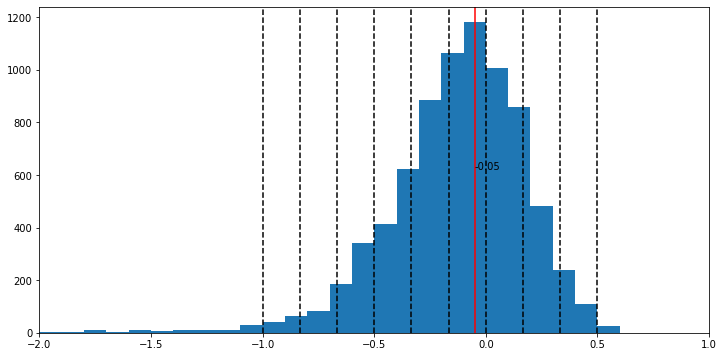

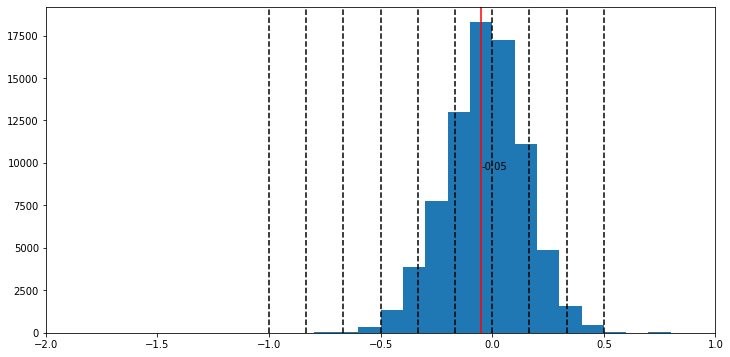

In [54]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
# idx = (yu["Phase"]>=1)
# h = ax.hist(yu["[Fe/H]"][idx], bins=np.arange(-2.5,1.0,0.1))
idx = (yu["Phase"]==2)
h = ax.hist(yu["[Fe/H]"][idx], bins=np.arange(-2.5,1.0,0.1))

mean=h[1][np.where(h[0]==h[0].max())[0][0]]+0.05
feh_limits=np.linspace(-1.0, 0.5, 10)
for feh in feh_limits:
    ax.axvline(feh, linestyle="--", color="black") 
ax.axvline(mean, linestyle="-", color="red") 
ax.text(mean, np.mean(ax.get_ylim()), "{:0.2f}".format(mean),  color="black")
ax.set_xlim([-2., 1.0])

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
h = ax.hist(pdv_feh, bins=np.arange(-2.5,1.0,0.1))

mean=h[1][np.where(h[0]==h[0].max())[0][0]]+0.05
feh_limits=np.linspace(-1.0, 0.5, 10)
for feh in feh_limits:
    ax.axvline(feh, linestyle="--", color="black") 
ax.axvline(mean, linestyle="-", color="red") 
ax.text(mean, np.mean(ax.get_ylim()), "{:0.2f}".format(mean),  color="black")
ax.set_xlim([-2., 1.0])

In [4]:
# ip = [0., 33.3, 66.6, 100.]
# for i in range(4):
#     print(np.percentile(yu["[Fe/H]"], ip[i]))
idx =  (yu["Phase"]==2) & (yu["[Fe/H]"]<0.1) & (yu["[Fe/H]"]>-0.1)
print(len(yu[idx]))

2096


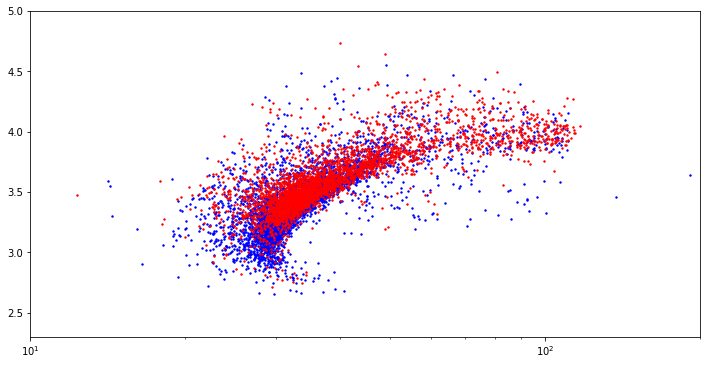

In [5]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
ax.axis([10, 200, 2.3, 5.0])
ax.set_xscale("log")

feh_limits = [-2.0, -0.05, 1.0] 
colors = ["blue", "red"] #sns.diverging_palette(220, 20, n=len(feh_ll))
labels = ["-2.0<[Fe/H]<-0.05", "-0.05<[Fe/H]<1.0"]
for igroup in range(len(feh_limits)-1):
    idx = (yu["[Fe/H]"]>=feh_limits[igroup]) & (yu["[Fe/H]"]<feh_limits[igroup+1]) & (yu["Phase"]==2)
    x, y = yu["numax"][idx], yu["numax"][idx]**0.75/yu["Delnu"][idx]
    ax.scatter(x, y, color=colors[igroup], s=2, label=labels[igroup])


# idx = (yu["[Fe/H]"]>=-1.0) & (yu["[Fe/H]"]<1.0) & (yu["Phase"]==2)
# x, y = yu["numax"][idx], yu["numax"][idx]**0.75/yu["Delnu"][idx]
# c = ax.scatter(x, y, c=yu["[Fe/H]"][idx], s=2, cmap="seismic")
# plt.colorbar(c, ax=ax, orientation='vertical')

Text(0, 0.5, 'numax^0.75/dnu')

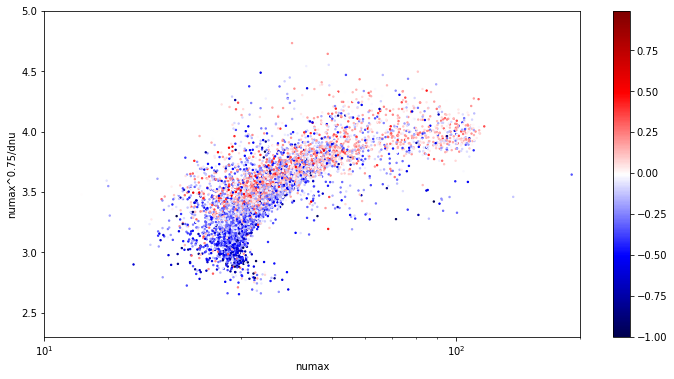

In [6]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
ax.axis([10, 200, 2.3, 5.0])
ax.set_xscale("log")

# idx=(yu["Phase"]==2)
# x, y = yu["numax"][idx], yu["numax"][idx]**0.75/yu["Delnu"][idx]
# feh = yu["[Fe/H]"][idx]
# c=ax.scatter(x, y, c=feh, cmap="rainbow", s=2, label=labels[igroup])
# ax.set_title("Purely observations")
# plt.colorbar(c)
# ax.legend()

idx = (yu["[Fe/H]"]>=-1.0) & (yu["[Fe/H]"]<1.0) & (yu["Phase"]==2)
x, y = yu["numax"][idx], yu["numax"][idx]**0.75/yu["Delnu"][idx]
c = ax.scatter(x, y, c=yu["[Fe/H]"][idx], s=2, cmap="seismic")
plt.colorbar(c, ax=ax, orientation='vertical')
ax.set_xlabel("numax")
ax.set_ylabel("numax^0.75/dnu")

# quantify the dege
## on the two diagrams
### Observations

In [34]:
# set up data
idx = (yu["Phase"]==2) #& (np.array(yu["numax"]**0.75/yu["Delnu"])>3.0)
# edges = np.load(rootpath+"sample/obs/tnu_edge_samples.npy")
# tck = np.load(rootpath+"sample/obs/spline_tck.npy", allow_pickle=True)
# dist = distance_to_edge(yu["numax"], yu["numax"]**0.75/yu["Delnu"], 
#                         edges[:,0], edges[:,1], tck, diagram="nike", distance="horizontal")

# idx = (yu["Phase"]==2) & (dist>-2)

numax_obs, nike_obs, dnu_obs = np.asarray(yu["numax"][idx]), np.asarray(yu["numax"][idx]**0.75/yu["Delnu"][idx]), np.asarray(yu["Delnu"][idx])
Nobs = numax.shape[0]
feh_obs = np.asarray(yu["[Fe/H]"][idx])
mass_obs = np.asarray(yu["ClcorM"][idx])
radius_obs = np.asarray(yu["ClcorR"][idx])

e_numax_obs = np.asarray(yu["e_numax"][idx])
a, b = yu["numax"][idx], yu["Delnu"][idx]
e_nike_obs = np.asarray(((0.75*a**-0.25*b**-1*yu["e_numax"][idx])**2.0 + (a**0.75*b**-2*yu["e_Delnu"][idx])**2.0)**0.5)
e_dnu_obs = np.array(yu["e_Delnu"][idx])
e_feh_obs = np.asarray(yu["e_[Fe/H]"][idx])
e_mass_obs = np.asarray(yu["e_ClcorM"][idx])
e_radius_obs = np.asarray(yu["e_ClcorR"][idx])

mass_obs_nc = np.asarray(yu["NoCorM"][idx])
radius_obs_nc = np.asarray(yu["NoCorR"][idx])
e_mass_obs_nc = np.asarray(yu["e_NoCorM"][idx])
e_radius_obs_nc = np.asarray(yu["e_NoCorR"][idx])

teff_obs = np.asarray(yu["Teff"][idx])
e_teff_obs = np.asarray(yu["e_Teff"][idx])

Check whether we can obtain the same mass as yu+18

and yes we can!

outside interp range 156  out of  7703


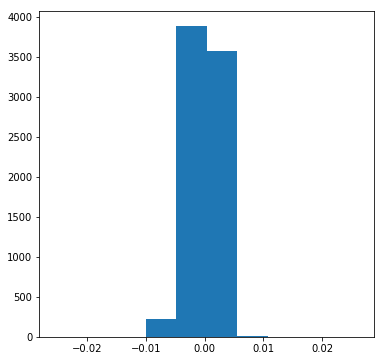

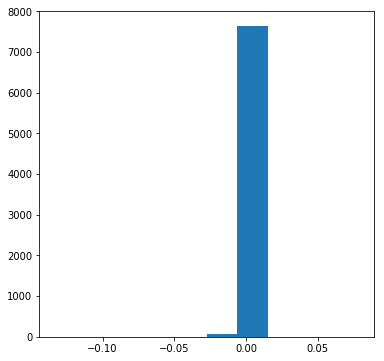

In [29]:
from fdnu import asfgrid
s=asfgrid.Seism(datadir=rootpath+"fdnu/")
Nstars = mass_obs.shape[0]
evstate = np.zeros(Nstars)+2
logz = feh_obs + np.log10(0.019)
teff = np.array(yu["Teff"][idx])
my_mass, my_radius = s.get_mass_radius(evstate, logz, teff_obs, dnu_obs, numax_obs)

# plt.figure(figsize=(6,6))
# plt.plot(my_mass, mass_obs, "k.")
# # plt.axis([0,10,0,10])
# plt.show()
# plt.figure(figsize=(6,6))
# plt.plot(my_radius, radius_obs, "k.")
# # plt.axis([0,20,0,20])
# plt.show()
plt.figure(figsize=(6,6))
plt.hist(my_mass-mass_obs)
plt.show()
plt.figure(figsize=(6,6))
plt.hist(my_radius-radius_obs)
plt.show()

Output observation samples

In [44]:
data = {"dnu":dnu_obs, "numax":numax_obs, "feh": feh_obs, "mass":mass_obs, "radius":radius_obs,
       "mass_nc": mass_obs_nc, "radius_nc":radius_obs_nc, "nike":nike_obs, "teff":teff_obs,
       "e_dnu":e_dnu_obs, "e_numax":e_numax_obs, "e_feh": e_feh_obs, "e_mass":e_mass_obs, "e_radius":e_radius_obs,
       "e_mass_nc": e_mass_obs_nc, "e_radius_nc":e_radius_obs_nc, "e_nike":e_nike_obs, "e_teff":e_teff_obs}

filepath = rootpath+"sample/obs/"
np.save(filepath+"yu18", data)

filepath = rootpath+"sample/obs_nc/"
np.save(filepath+"yu18", data)

In [93]:
import scipy.spatial.distance
import scipy.interpolate

def distance_to_edge(xdata, ydata, xedge, yedge, tcks, tp, diagram="tnu", distance="shortest"):

    if not (diagram in ["tnu", "mr"]):
        raise ValueError("diagram should be in ['tnu', 'mr']")
    if not (distance in ["vertical", "horizontal"]):
        raise ValueError("distance should be in ['vertical', 'horizontal']")
    # Ndata, Nedge = xdata.shape[0], xedge.shape[0]

    if distance=="vertical": #y
        if diagram=="tnu":
            idx = xdata >= xedge.min()
            xdata, ydata = xdata[idx], ydata[idx]
            dist = np.zeros(xdata.shape[0])

            # first consider clumps, upper part
            idx = xedge<tp[0]
            yp = yedge[idx][xedge[idx]==xedge[idx].min()][0]
            idx_data = (ydata >= yp) & (xdata<=31) 
            idx_edge = (yedge >= yp) & (xedge<=31) 
            if xdata[idx_data].shape[0] != 0:
                Xa = np.array([xdata[idx_data]]).T
                Xb = np.array([xedge[idx_edge]]).T
                Y = scipy.spatial.distance.cdist(Xa, Xb)
                argdist = np.argmin(Y, axis=1)
                dist[idx_data] = (ydata[idx_data] - yedge[idx_edge][argdist]) 
            
            # next, consider clumps (lower part) and secondary clumps
            idx_data = ~idx_data
            idx_edge = ~idx_edge  
            Xa = np.array([xdata[idx_data]]).T
            Xb = np.array([xedge[idx_edge]]).T
            Y = scipy.spatial.distance.cdist(Xa, Xb)
            argdist = np.argmin(Y, axis=1)
            dist[idx_data] = -(ydata[idx_data] - yedge[idx_edge][argdist]) 
        else:# diagram=="mr":
            Xa = np.array([xdata]).T
            Xb = np.array([xedge]).T
            Y = scipy.spatial.distance.cdist(Xa, Xb)
            argdist = np.argmin(Y, axis=1)
            dist = (ydata - yedge[argdist])
            
            
    if distance=="horizontal": #x
        if diagram=="tnu":
            idx = ydata >= yedge.min()
            xdata, ydata = xdata[idx], ydata[idx]
            dist = np.zeros(xdata.shape[0])
            
            # first consider clumps, left part
            idx = xedge<tp[0]
            xp = xedge[idx][yedge[idx]==yedge[idx].min()][0]
            idx_data = xdata <= xp
            idx_edge = xedge <= xp
            if xdata[idx_data].shape[0] != 0:
                Xa = np.array([ydata[idx_data]]).T
                Xb = np.array([yedge[idx_edge]]).T
                Y = scipy.spatial.distance.cdist(Xa, Xb)
                argdist = np.argmin(Y, axis=1)
                dist[idx_data] = -(xdata[idx_data] - xedge[idx_edge][argdist]) 
                
            # next, consider clumps (right part)
            idx_data = (xdata > xp) & (xdata<= tp[0])
            idx_edge = (xedge > xp) & (xedge<= tp[0])
            Xa = np.array([ydata[idx_data]]).T
            Xb = np.array([yedge[idx_edge]]).T
            Y = scipy.spatial.distance.cdist(Xa, Xb)
            argdist = np.argmin(Y, axis=1)
            dist[idx_data] = (xdata[idx_data] - xedge[idx_edge][argdist]) 

            # finally, consider secondary clumps
            idx_data = (xdata > tp[0])
            idx_edge = (xedge > tp[0])
            Xa = np.array([ydata[idx_data]]).T
            Xb = np.array([yedge[idx_edge]]).T
            Y = scipy.spatial.distance.cdist(Xa, Xb)
            argdist = np.argmin(Y, axis=1)
            dist[idx_data] = -(xdata[idx_data] - xedge[idx_edge][argdist]) 
            
        else:# diagram=="mr":
            idx = (ydata <= yedge[xedge<tp[0]].max())
            xdata, ydata = xdata[idx], ydata[idx]
            dist = np.zeros(xdata.shape[0])
            # first, consider left part of clumps
            idx = xedge<tp[0]
            xp = xedge[idx][yedge[idx]==yedge[idx].max()][0]
            idx_data = xdata <= xp
            idx_edge = xedge <= xp
            if xdata[idx_data].shape[0] != 0:
                Xa = np.array([ydata[idx_data]]).T
                Xb = np.array([yedge[idx_edge]]).T
                Y = scipy.spatial.distance.cdist(Xa, Xb)
                argdist = np.argmin(Y, axis=1)
                dist[idx_data] = -(xdata[idx_data] - xedge[idx_edge][argdist]) 

            # next, consider right part of clumps
            idx_data = (xdata > xp) & (xdata<=tp[0])
            idx_edge = (xedge > xp) & (xedge<=tp[0])
            Xa = np.array([ydata[idx_data]]).T
            Xb = np.array([yedge[idx_edge]]).T
            Y = scipy.spatial.distance.cdist(Xa, Xb)
            argdist = np.argmin(Y, axis=1)
            dist[idx_data] = (xdata[idx_data] - xedge[idx_edge][argdist])             

            # finally, secondary clumps
            idx_data = (xdata>tp[0])
            idx_edge = (xedge>tp[0])
            Xa = np.array([ydata[idx_data]]).T
            Xb = np.array([yedge[idx_edge]]).T
            Y = scipy.spatial.distance.cdist(Xa, Xb)
            argdist = np.argmin(Y, axis=1)
            dist[idx_data] = -(xdata[idx_data] - xedge[idx_edge][argdist])      
            
#     # signs: left or right?
#     if diagram=="tnu":
#         # clumps
#         idx_right = xdata>10.0**scipy.interpolate.splev(np.log10(xdata**0.75/ydata), tcks[0], der=0)
#         idx = idx_right & (xdata<tp[0])
#         dist[idx] = -dist[idx]
        
#         # secondary clumps
#         idx_right = xdata>10.0**scipy.interpolate.splev(np.log10(xdata**0.75/ydata), tcks[1], der=0)
#         idx = idx_right & (xdata>=tp[0])
#         dist[idx] = -dist[idx]        
#     if diagram=="mr":
#         # clumps
#         idx_right = ydata<scipy.interpolate.splev(xdata, tcks[0], der=0)
#         idx = idx_right & (xdata<tp[0])
#         dist[idx] = -dist[idx]
        
#         # secondary clumps
#         idx_right = ydata<scipy.interpolate.splev(xdata, tcks[1], der=0)
#         idx = idx_right & (xdata>=tp[0])
#         dist[idx] = -dist[idx]

    return dist, xdata, ydata

In [94]:
def edge_analysis(xdata, ydata, ydatat, filepath, points, tp, title):
    # plot two diagrams
    fig = plt.figure(figsize=(12,12))
    axes = fig.subplots(nrows=2,ncols=1)
#     axes[0].axis([10, 200, 2.3, 5.0])
#     axes[0].set_xscale("log")
    for i in range(2):
        axes[i].axis([10, 200, 2.3, 10.0])
        axes[i].set_xscale("log")

        axes[i].set_title(title)
        axes[i].grid(which="both")
        axes[i].set_xlabel("numax")
        axes[i].set_ylabel("dnu")

    # cubic spline interpolation
    # points
    tcks = []
    ymin = min(np.array([points[0][i][1] for i in range(len(points[0]))]).min(), np.array([points[1][i][1] for i in range(len(points[1]))]).min())
    ymax = max(np.array([points[0][i][1] for i in range(len(points[0]))]).max(), np.array([points[1][i][1] for i in range(len(points[1]))]).max())
    yedge = np.arange(ymin, ymax, 0.0001)
    xedge = np.zeros(len(yedge))
    idx = [yedge<tp[1], yedge>=tp[1]]
    for j, point in enumerate(points):
        Npoint = len(point)
        xpoint, ypoint = np.array([point[i][0] for i in range(Npoint)]), np.array([point[i][1] for i in range(Npoint)])
        import scipy.interpolate
        tck = scipy.interpolate.splrep(np.log10(ypoint), np.log10(xpoint), s=0)
        tcks.append(tck)

        # plot knots and edge 
        axes[0].plot(xpoint, xpoint**0.75/ypoint, "k.", markersize=10)
        axes[1].plot(xpoint, xpoint**0.75/ypoint, "k.", markersize=10)
        xedge[idx[j]] = 10.0**scipy.interpolate.splev(np.log10(yedge[idx[j]]), tck, der=0)
    
    yedge = xedge**0.75/yedge
    axes[0].plot(xedge, yedge, "k.", ms=1) 
    axes[1].plot(xedge, yedge, "k.", ms=1) 
    
    # save spline coefficients
    np.save(filepath+"nike_spline_tck", [tcks, tp])
    

    # save edges
    np.save(filepath+"nike_edge_samples", np.array([xedge, xedge**0.75/yedge]).T)
    np.save(filepath+"tnu_edge_samples", np.array([xedge, yedge]).T)
#     test = xedge**0.75/yedge
#     idx = (test>6) & (test<8)
#     print(len(test[idx]))


    dx, numaxx, dnux = distance_to_edge(xdata, ydatat, xedge, yedge, tcks, tp, diagram="tnu", distance="horizontal")
    dy, numaxy, dnuy = distance_to_edge(xdata, ydatat, xedge, yedge, tcks, tp, diagram="tnu", distance="vertical")
    axes[0].plot(numaxx, dnux, "r.", markersize=2, label="horizontal data")
    axes[1].plot(numaxy, dnuy, "b.", markersize=2, label="vertical data")
    axes[0].legend()
    axes[1].legend()
    
    # # now plot histograms
    fig = plt.figure(figsize=(12,12))
    axes = fig.subplots(nrows=2,ncols=1)
    axes[0].set_xlim(-20, 82)
    axes[1].set_xlim(-2, 4)
    bins0 = np.linspace(-20, 82, 600)
    bins1 = np.linspace(-2, 12, 600)
    # bins0 = np.linspace(distn.min(), distn.max(), 1500)
    # bins1 = np.linspace(distt.min(), distt.max(), 1500)
    h=axes[0].hist(dx, histtype="step", color="red",
        bins=bins0, zorder=0)
    h=axes[1].hist(dy, histtype="step", color="red",
        bins=bins1, zorder=0)
    axes[0].set_xlabel("Horizontal distance")
    axes[1].set_xlabel("Vertical distance")
    axes[0].set_ylabel("Ncount")
    axes[1].set_ylabel("Ncount")
    axes[0].grid(which="both")
    axes[1].grid(which="both")
    axes[0].set_title(title)
    axes[1].set_title(title)
    plt.show()
    plt.show()
    return

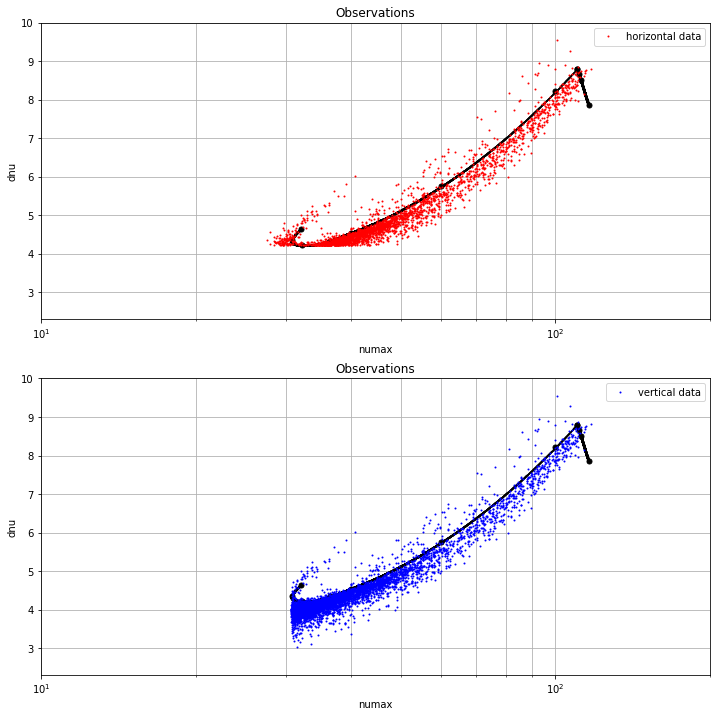

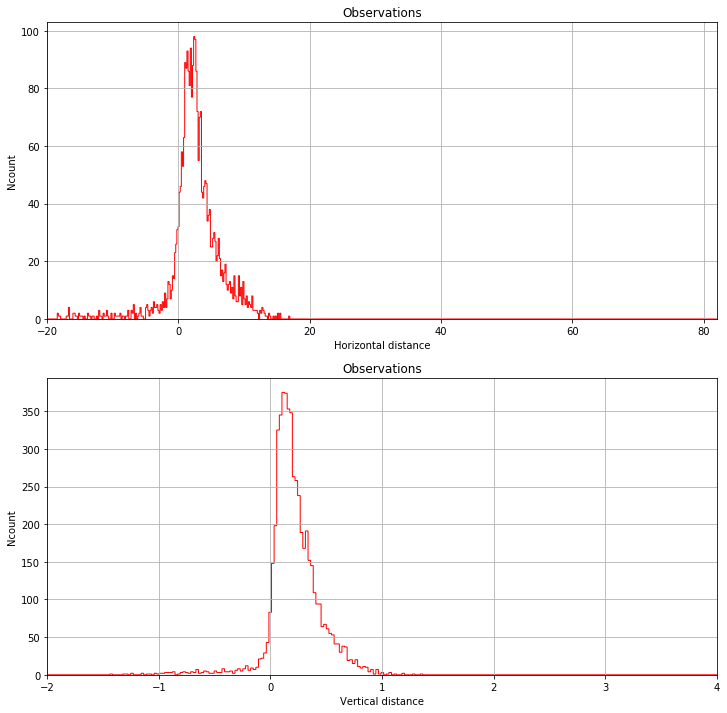

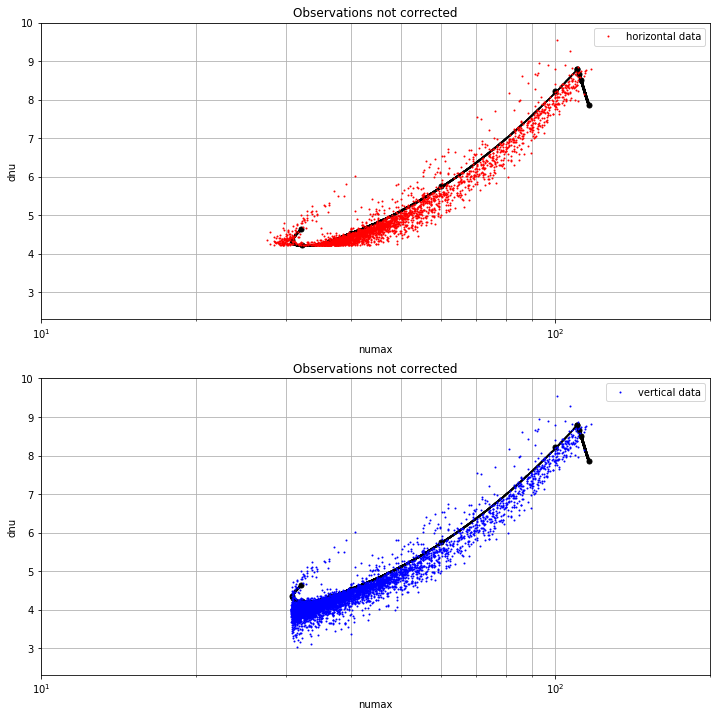

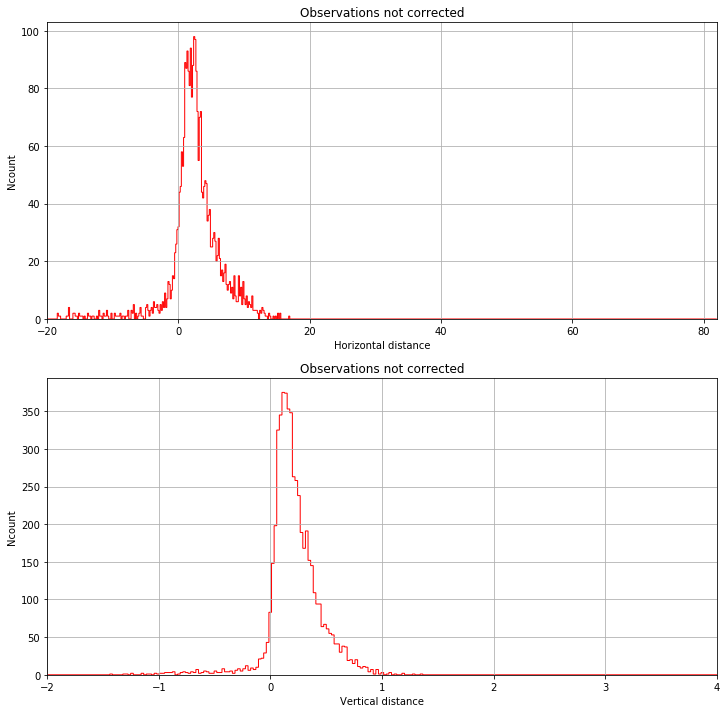

In [95]:
# corrected observation
filepath = rootpath+"sample/obs/"
points1=[(32, 2.9), (30.7, 3.0), (32.2, 3.2), (36.5, 3.42), (40, 3.5), (60, 3.75), (100, 3.85), (110, 3.86)]
points2=[(110, 3.86), (111, 3.95), (112, 4.05), (116, 4.5)]
points=[points1,points2]
tp= (110, 3.86)
title = "Observations"
edge_analysis(numax_obs, nike_obs, dnu_obs, filepath, points, tp, title)

# not corrected observation
filepath = rootpath+"sample/obs_nc/"
points1=[(32, 2.9), (30.7, 3.0), (32.2, 3.2), (36.5, 3.42), (40, 3.5), (60, 3.75), (100, 3.85), (110, 3.86)]
points2=[(110, 3.86), (111, 3.95), (112, 4.05), (116, 4.5)]
points=[points1,points2]
tp= (110, 3.86)
title = "Observations not corrected"
edge_analysis(numax_obs, nike_obs, dnu_obs, filepath, points, tp, title)


### Padova

In [96]:
# set up data
import ebf
synp=ebf.read(rootpath+"sample/kepler_galaxia_mrtd5.ebf")
Nstar = synp["alpha"].shape[0]
# factor = int(Nstar/16000)
# idx = np.arange(0,int(Nstar/factor))*factor
# for key in synp.keys():
#     synp[key] = synp[key][idx]


# # corrected dnu and numax
idx = (synp["evstate"]==2) & (np.isfinite(synp["numax"])) & (np.isfinite(synp["dnu"])) & (np.isfinite(synp["feh"])) & (np.array(synp["numax"]**0.75/synp["dnu"])>3.0)
numax, nike, dnu = np.array(synp["numax"][idx]), np.array(synp["numax"][idx]**0.75/synp["dnu"][idx]), np.array(synp["dnu"][idx])
dnu_nc = np.array(synp["dnu_scaling"][idx])
nike_nc = np.array(numax**0.75/dnu_nc)
mass, radius =  np.array(synp["mact"][idx]), np.array(synp["radius"][idx])
feh = synp["feh"][idx]

Npdv = numax.shape[0]

data = {"dnu":dnu, "numax":numax, "feh": feh, "mass":mass, "radius":radius,
       "dnu_nc": dnu_nc, "nike_nc":nike_nc}

filepath = rootpath+"sample/padova/"
np.save(filepath+"padova", data)

filepath = rootpath+"sample/padova_nc/"
np.save(filepath+"padova", data)

/Users/yaguang/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in greater
  if sys.path[0] == '':


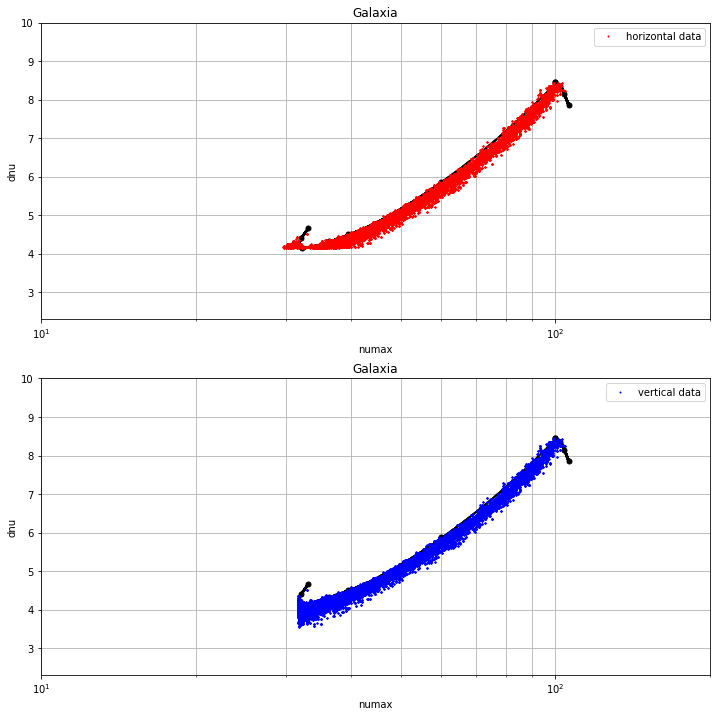

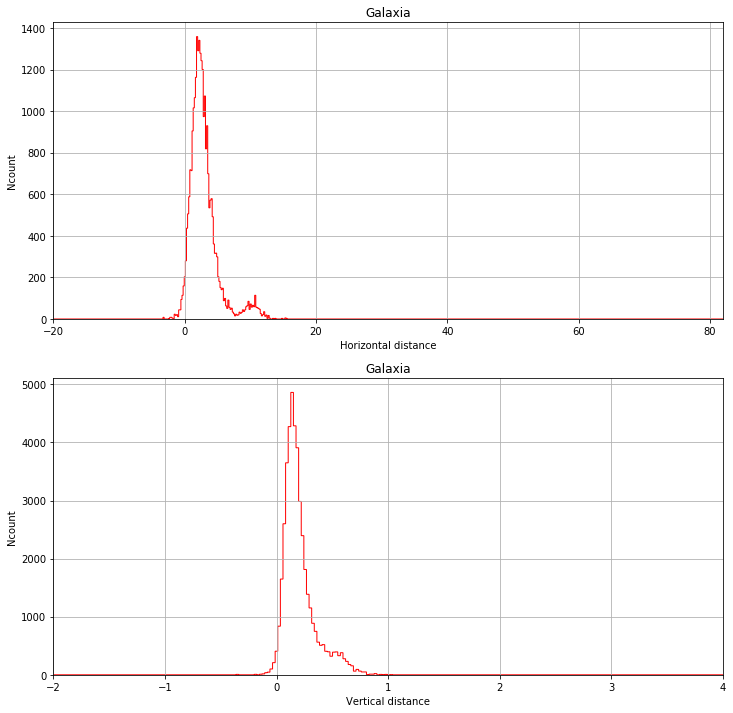

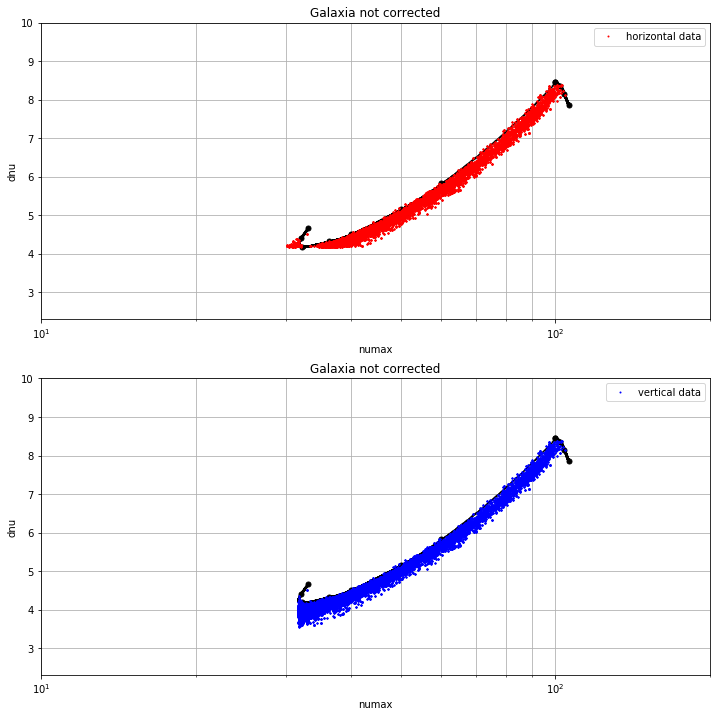

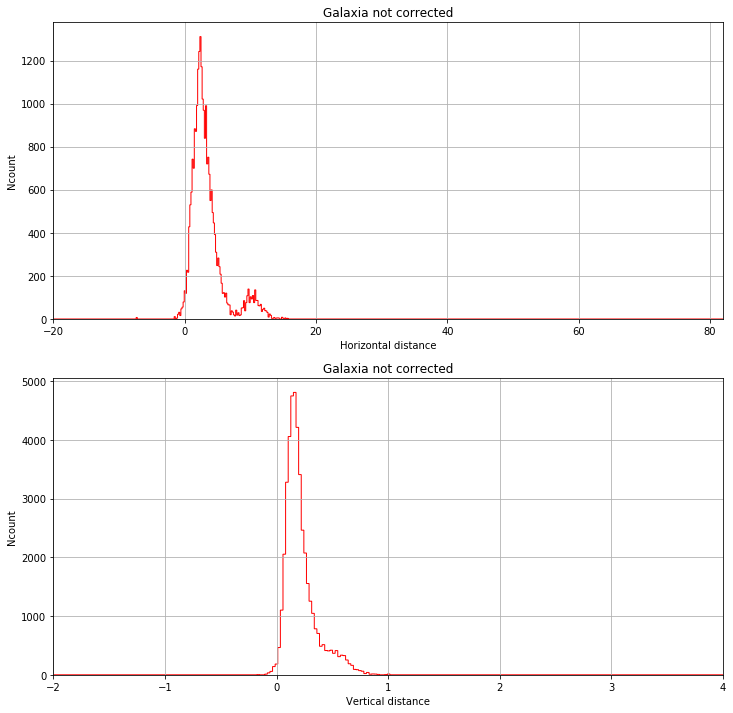

In [97]:
filepath = rootpath+"sample/padova/"
points1=[(33, 2.95), (32, 3.05), (32.2, 3.25), (36.3, 3.42), (39.6, 3.50), (60, 3.67), (100, 3.74)]
points2=[(100, 3.74), (102, 3.84), (104, 4.0), (106, 4.2)]
points=[points1,points2]
tp=(100, 3.74)
title = "Galaxia"
edge_analysis(numax, nike, dnu, filepath, points, tp, title)


filepath = rootpath+"sample/padova_nc/"
points1=[(33, 2.95), (32, 3.05), (32.2, 3.23), (36.3, 3.42), (40, 3.53), (50, 3.65), (60, 3.70), (100, 3.74)]
points2=[(100, 3.74), (102, 3.84), (104, 4.0), (106, 4.2)]
points=[points1,points2]
tp=(100, 3.74)
title = "Galaxia not corrected"
edge_analysis(numax, nike, dnu_nc, filepath, points, tp, title)

# Galaxia with initial mass

In [47]:
# # set up data
# import ebf
# synp=ebf.read(rootpath+"sample/kepler_galaxia_mrtd5.ebf")
# Nstar = synp["alpha"].shape[0]
# # factor = int(Nstar/16000)
# # idx = np.arange(0,int(Nstar/factor))*factor
# # for key in synp.keys():
# #     synp[key] = synp[key][idx]

# idx = (synp["evstate"]==2) & (np.isfinite(synp["numax"])) & (np.isfinite(synp["dnu"])) & (np.isfinite(synp["feh"])) & (np.array(synp["numax"]**0.75/synp["dnu"])>3.0)
# xpdv, ypdv, ypdvt, feh_pdv = np.array(synp["numax"][idx]), np.array(synp["numax"][idx]**0.75/synp["dnu"][idx]), np.array(synp["dnu"][idx]), np.array(synp["feh"][idx])
# Npdv = xpdv.shape[0]
# mass_pdv, radius_pdv =  np.array(synp["smass"][idx]), np.array(synp["radius"][idx])

# feh_pdv = synp["feh"][idx]

# filepath = rootpath+"sample/padova_oversampling_mini/"
# points=[(33, 2.95), (32, 3.05), (32.2, 3.25), (36.3, 3.42), (39.6, 3.50), (60, 3.67), (100, 3.74)]
# title = "Galaxia"
# edge_analysis(xpdv, ypdv, ypdvt, filepath, feh_pdv, mass_pdv, radius_pdv, points, title)

# Galaxia with mist

In [111]:
# set up data
mist=np.load(rootpath+"sample/kepler_galaxia_mist_uncofeh.npy")
Nstar = mist.shape[0]

idx = mist["phase"]>=3 #(np.isfinite(mist["numax"])) & (np.isfinite(mist["dnu"])) & (np.isfinite(synp["feh"])) & (np.array(synp["numax"]**0.75/synp["dnu"])>3.0)
xpdv, ypdv, ypdvt, feh_pdv = np.array(mist["numax"][idx]), np.array(mist["numax"][idx]**0.75/mist["dnu_scaling"][idx]), np.array(mist["dnu_scaling"][idx]), np.array(mist["feh"][idx])
Npdv = xpdv.shape[0]
mass_pdv, radius_pdv =  np.array(mist["mass"][idx]), np.array(mist["radius"][idx])

# feh_pdv = mist["feh"][idx]

# filepath = rootpath+"sample/mist/"
# points=[(32, 2.9), (30.7, 3.0), (32.2, 3.2), (36.5, 3.42), (40, 3.5), (60, 3.75), (100, 3.85), (112, 3.86)]
# title = "Galaxia with MIST"
# edge_analysis(xpdv, ypdv, ypdvt, filepath, feh_pdv, mass_pdv, radius_pdv, points, title)

Text(0, 0.5, 'Radius')

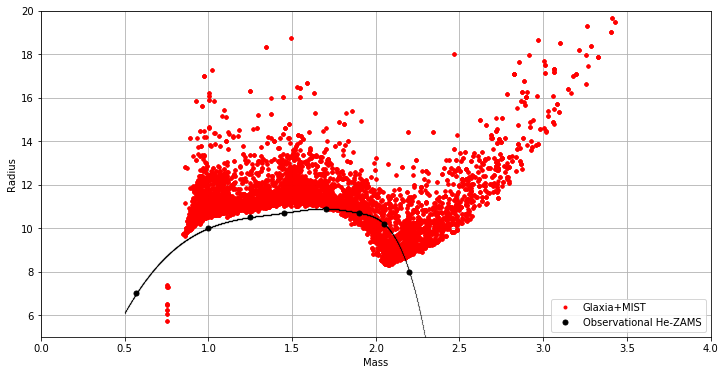

In [113]:
# set up data
mist=np.load(rootpath+"sample/kepler_galaxia_mist_uncofeh.npy")
Nstar = mist.shape[0]

idx = mist["phase"]>=3 #(np.isfinite(mist["numax"])) & (np.isfinite(mist["dnu"])) & (np.isfinite(synp["feh"])) & (np.array(synp["numax"]**0.75/synp["dnu"])>3.0)
xpdv, ypdv, ypdvt, feh_pdv = np.array(mist["numax"][idx]), np.array(mist["numax"][idx]**0.75/mist["dnu_scaling"][idx]), np.array(mist["dnu_scaling"][idx]), np.array(mist["feh"][idx])
Npdv = xpdv.shape[0]
mass_pdv, radius_pdv =  np.array(mist["mass"][idx]), np.array(mist["radius"][idx])


plt.figure(figsize=(12,6))
plt.plot(mass_pdv, radius_pdv, "r.", label="Glaxia+MIST")
plt.axis([0., 4.0, 5., 20.])
plt.grid(axis="both")

points=[(0.57, 7.0), (1.0, 10.0), (1.25, 10.5), (1.45, 10.7), (1.7, 10.9), (1.9, 10.7), (2.05, 10.2), (2.2, 8.0)]
Npoint = len(points)
xpoint, ypoint = np.array([points[i][0] for i in range(Npoint)]), np.array([points[i][1] for i in range(Npoint)])
import scipy.interpolate
tck = scipy.interpolate.splrep(xpoint, ypoint, s=0)
# plot knots and edge 
plt.plot(xpoint, ypoint, "k.", markersize=10, label="Observational He-ZAMS")
xedge = np.arange(0.5, 2.3, 0.0005)
yedge = scipy.interpolate.splev(xedge, tck, der=0)
Nedge = xedge.shape[0]
plt.plot(xedge, yedge, "k.", ms=0.2)
plt.legend()
plt.xlabel("Mass")
plt.ylabel("Radius")

(array([    0.,     0.,     0.,     0.,     0.,     0.,   267.,    66.,
        14451., 26062., 17808., 14466., 10659.,  7273.,  5720.,  3952.,
         3002.,  2634.,  2018.,  2151.,  1730.,  1109.,   759.,   638.,
          446.,   271.,   268.,    82.]),
 array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
        1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
        2.7, 2.8, 2.9]),
 <a list of 28 Patch objects>)

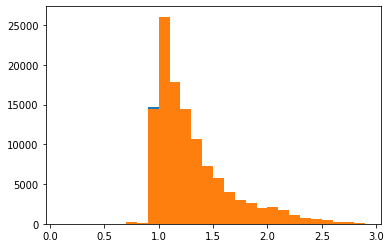

In [70]:
plt.hist(mist["mass"], bins=np.arange(0.1,3.0,0.1))
plt.hist(mist["initial_mass"], bins=np.arange(0.1,3.0,0.1))

(array([8.5480e+03, 2.5240e+04, 1.6956e+04, 1.0478e+04, 7.2000e+03,
        6.0470e+03, 4.8440e+03, 8.3400e+02, 0.0000e+00, 5.0000e+00]),
 array([0.719    , 0.9149237, 1.1108475, 1.3067713, 1.502695 , 1.6986187,
        1.8945425, 2.0904663, 2.2863898, 2.4823136, 2.6782374],
       dtype=float32),
 <a list of 10 Patch objects>)

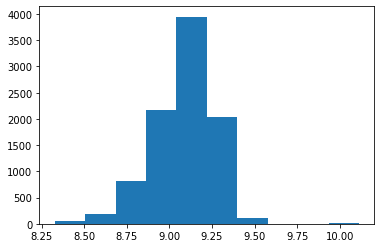

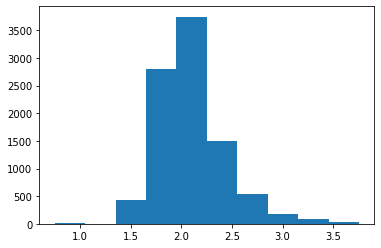

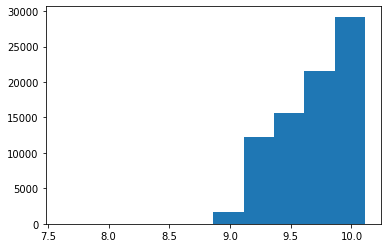

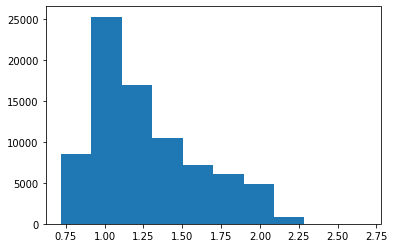

In [67]:
idx = mist["phase"]==3#==2
plt.hist(mist["age"][idx])
plt.figure()
plt.hist(mist["mass"][idx])


plt.figure()
idx = synp["evstate"]==2#==1
plt.hist(synp["log_age"][idx])
plt.figure()
plt.hist(synp["mact"][idx])

[3.9, 3.4, 0.0, 3.5]

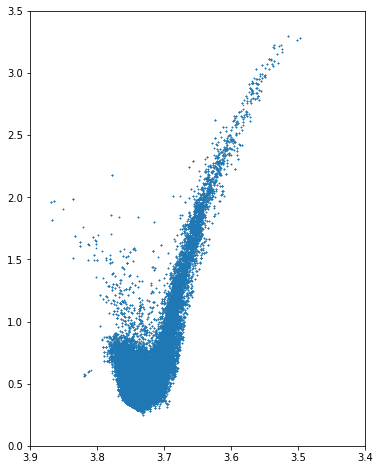

In [81]:
plt.figure(figsize=(6,8))
idx = mist["phase"]==2
plt.plot(mist["logTeff"][idx],mist["logL"][idx],".",ms=1)
plt.axis([3.9, 3.4, 0.0, 3.5])